In [1]:
pip install ydata_profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle 
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('Data.csv')

In [7]:
data

,Category,Indicators,2001-05,2006-10,2011-15,2016-20,2021-25
0,Projected Demographic Indicators,Population growth rate,1.6,1.4,1.3,1.1,0.9
1,Projected Demographic Indicators,Crude Birth rate,23.2,21.3,19.6,18.0,16.0
2,Projected Demographic Indicators,Crude Death rate,7.5,7.3,7.2,7.1,7.2
3,Projected Demographic Indicators,Infant Mortality Rate,61.3,54.3,49.2,44.0,40.2
4,Projected Demographic Indicators,Under-5 mortality rate,82.0,72.8,65.9,59.0,54.0
5,Projected Demographic Indicators,Total Fertility Rate,2.9,2.6,2.3,2.2,2.0
6,Projected Demographic Indicators,Life expectancy of males,63.8,65.8,67.3,68.8,69.8
7,Projected Demographic Indicators,Life expectancy of females,66.1,68.1,69.6,71.1,72.3


In [8]:
data.head()

,Category,Indicators,2001-05,2006-10,2011-15,2016-20,2021-25
0,Projected Demographic Indicators,Population growth rate,1.6,1.4,1.3,1.1,0.9
1,Projected Demographic Indicators,Crude Birth rate,23.2,21.3,19.6,18.0,16.0
2,Projected Demographic Indicators,Crude Death rate,7.5,7.3,7.2,7.1,7.2
3,Projected Demographic Indicators,Infant Mortality Rate,61.3,54.3,49.2,44.0,40.2
4,Projected Demographic Indicators,Under-5 mortality rate,82.0,72.8,65.9,59.0,54.0


In [9]:
data.tail()

,Category,Indicators,2001-05,2006-10,2011-15,2016-20,2021-25
3,Projected Demographic Indicators,Infant Mortality Rate,61.3,54.3,49.2,44.0,40.2
4,Projected Demographic Indicators,Under-5 mortality rate,82.0,72.8,65.9,59.0,54.0
5,Projected Demographic Indicators,Total Fertility Rate,2.9,2.6,2.3,2.2,2.0
6,Projected Demographic Indicators,Life expectancy of males,63.8,65.8,67.3,68.8,69.8
7,Projected Demographic Indicators,Life expectancy of females,66.1,68.1,69.6,71.1,72.3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    8 non-null      object 
 1   Indicators  8 non-null      object 
 2   2001-05     8 non-null      float64
 3   2006-10     8 non-null      float64
 4   2011-15     8 non-null      float64
 5   2016-20     8 non-null      float64
 6   2021-25     8 non-null      float64
dtypes: float64(5), object(2)
memory usage: 580.0+ bytes


In [11]:
data.describe()

,2001-05,2006-10,2011-15,2016-20,2021-25
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,38.550000,36.700000,35.300000,33.912500,32.800000
std,33.032408,31.523597,30.731928,30.203237,30.088678
min,1.600000,1.400000,1.300000,1.100000,0.900000
25%,6.350000,6.125000,5.975000,5.875000,5.900000
50%,42.250000,37.800000,34.400000,31.000000,28.100000
75%,64.375000,66.375000,66.250000,61.450000,57.950000
max,82.000000,72.800000,69.600000,71.100000,72.300000


In [12]:
data.shape

(8, 7)

In [13]:
data.size

56

### PLOTTING

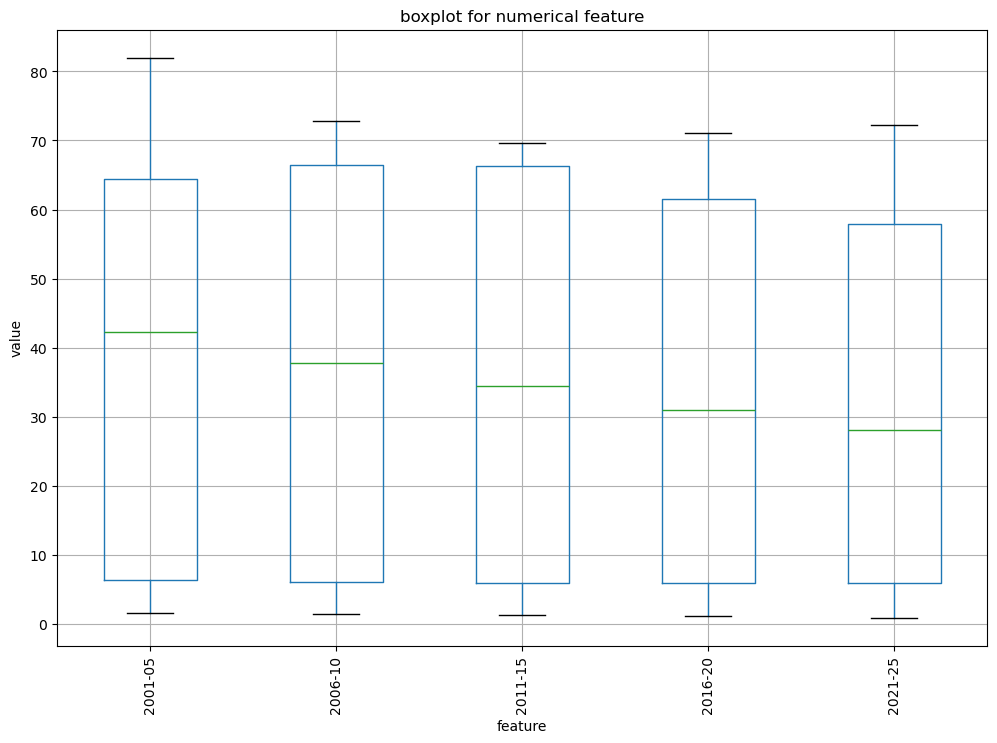

In [14]:
numerical_cols=data.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(12,8))
data[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title('boxplot for numerical feature')
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

### EDA

In [15]:
profile=ProfileReport(data,title='EDA',explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                            | 0/7 [00:00<?, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 35.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### INSIGHTS FROM EDA

### CORRELATIONS

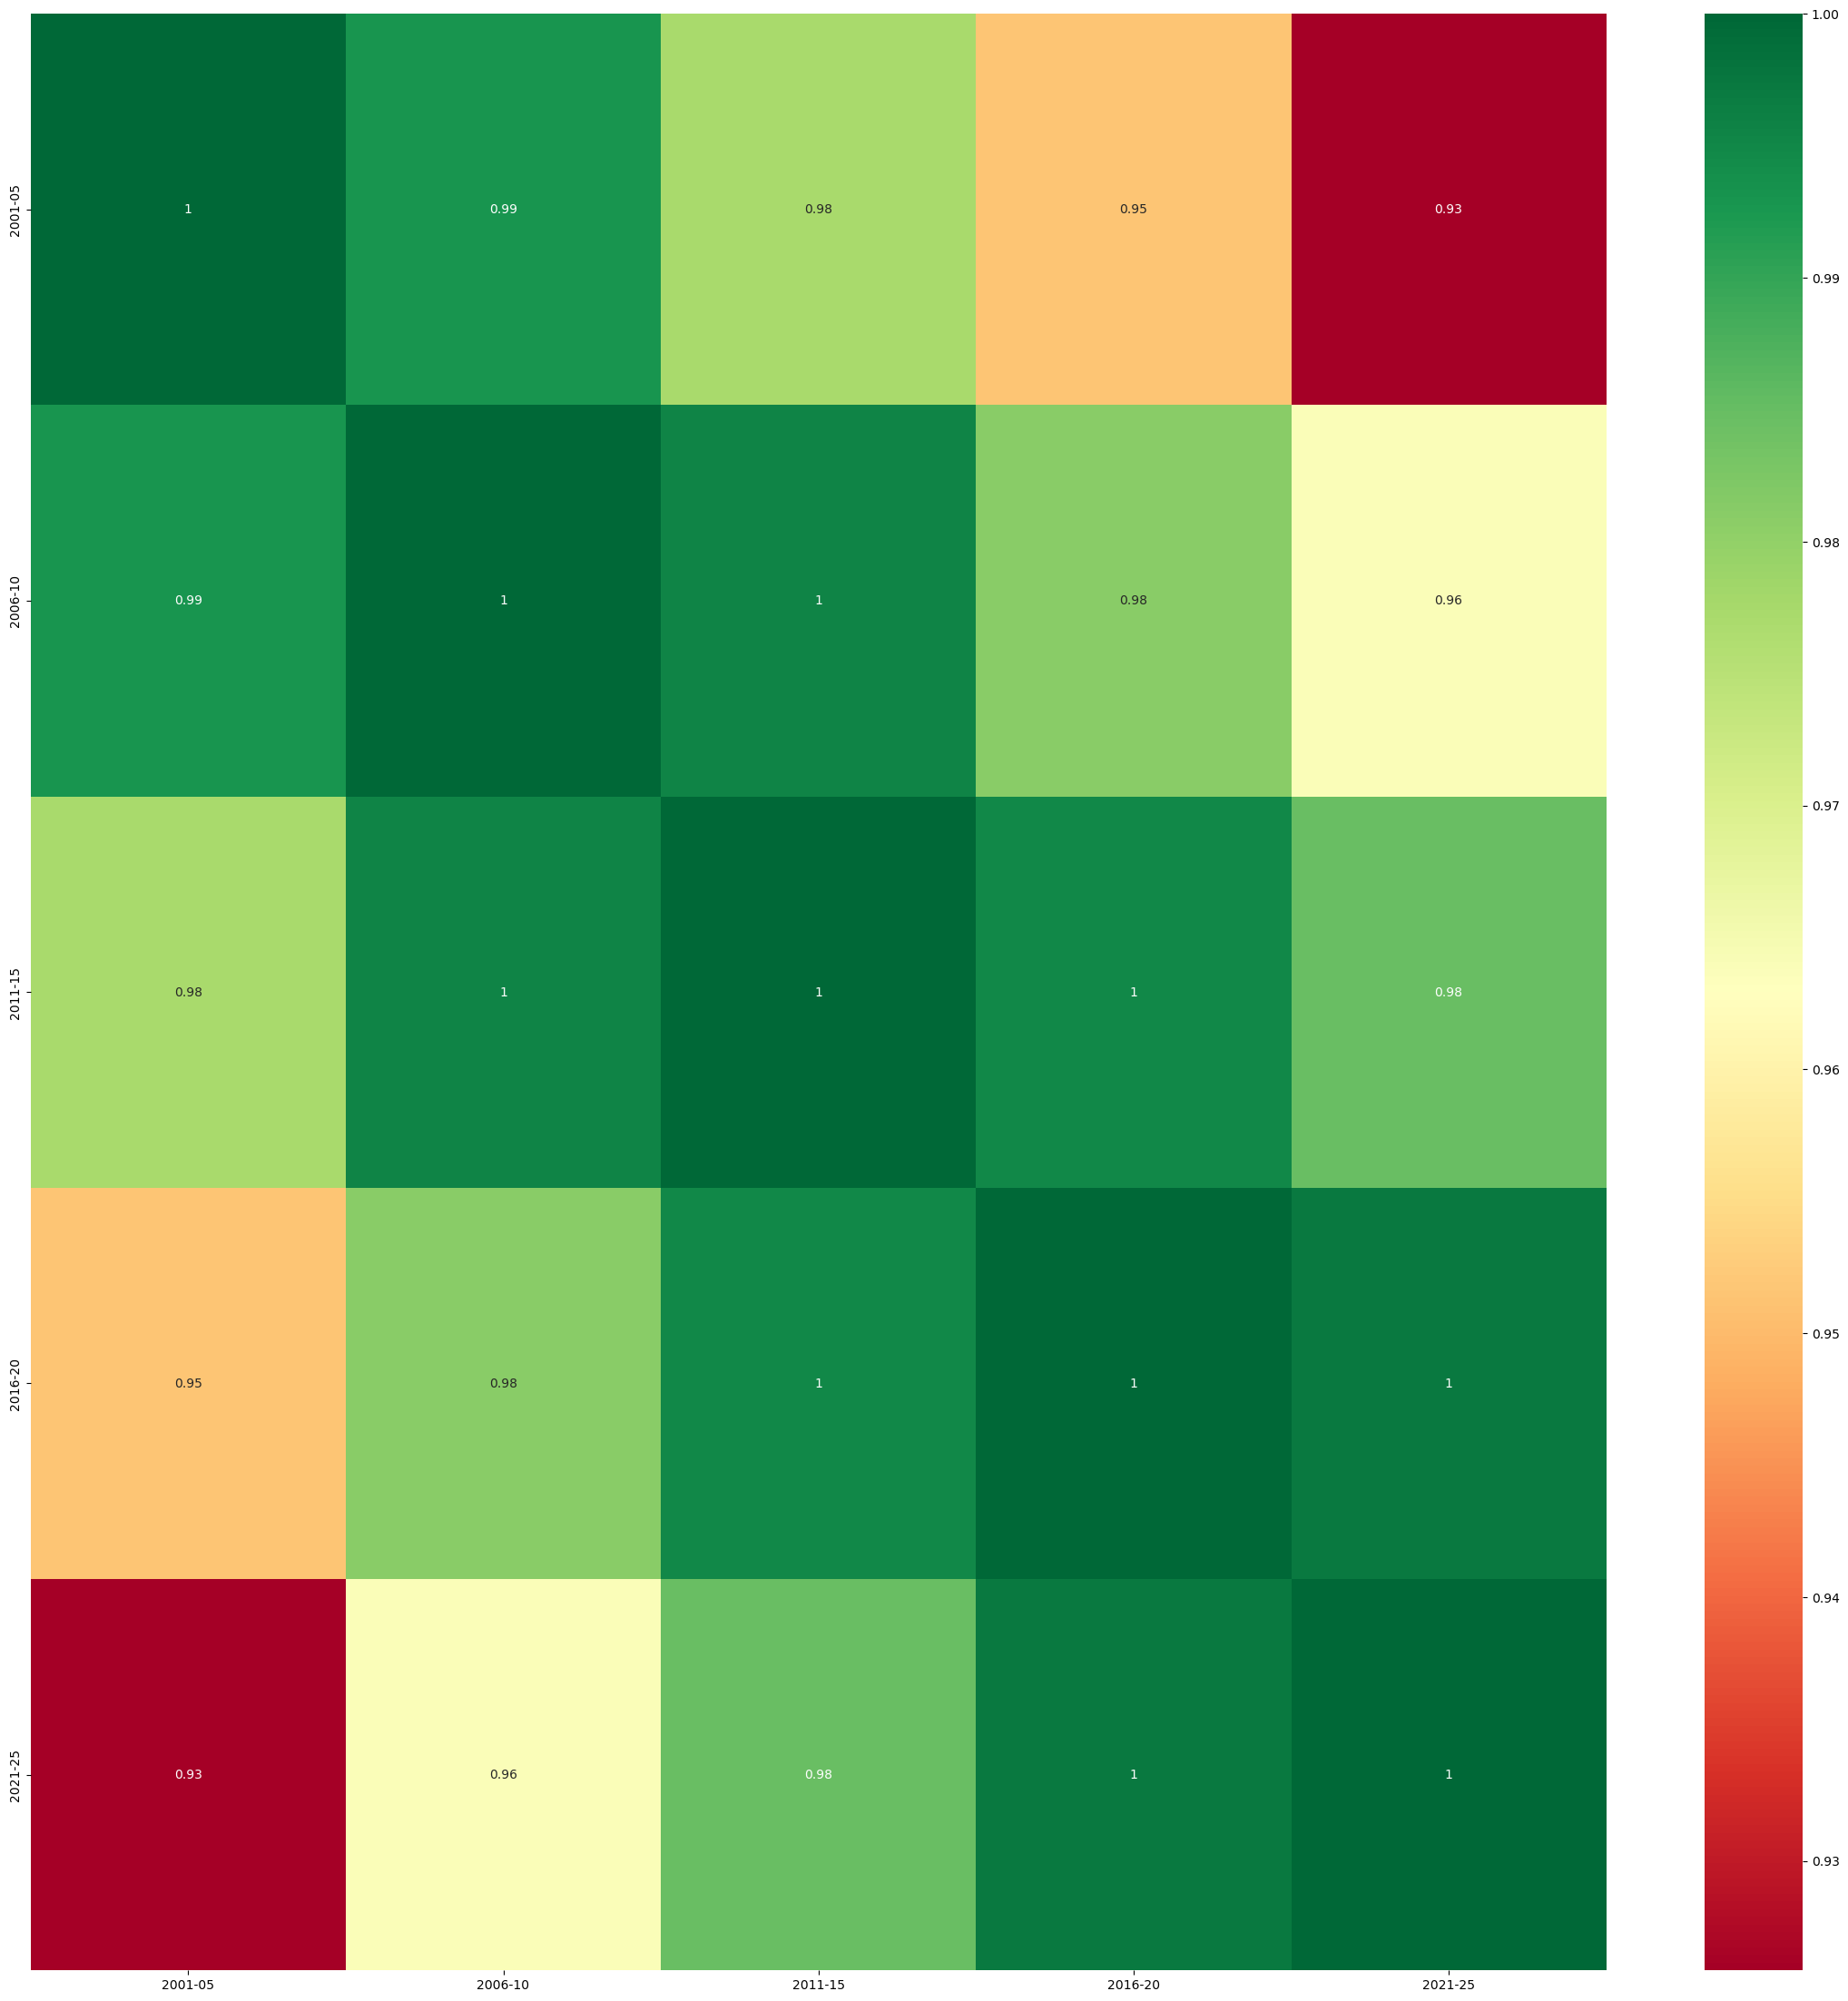

In [16]:
plt.figure(figsize=(28,28))
sns.heatmap(data.select_dtypes(include=['int','float']).corr(),cmap='RdYlGn',annot=True)
plt.show()

In [17]:
np.where(data.select_dtypes(include=['int','float']).corr()>0.9)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4]),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4]))

### PREPROCESSING

In [18]:
data.columns

Index(['Category', 'Indicators', '2001-05', '2006-10', '2011-15', '2016-20',
       '2021-25'],
      dtype='object')

In [19]:
data[['Category','Indicators','2001-05','2006-10','2011-15','2016-20','2021-25']]

,Category,Indicators,2001-05,2006-10,2011-15,2016-20,2021-25
0,Projected Demographic Indicators,Population growth rate,1.6,1.4,1.3,1.1,0.9
1,Projected Demographic Indicators,Crude Birth rate,23.2,21.3,19.6,18.0,16.0
2,Projected Demographic Indicators,Crude Death rate,7.5,7.3,7.2,7.1,7.2
3,Projected Demographic Indicators,Infant Mortality Rate,61.3,54.3,49.2,44.0,40.2
4,Projected Demographic Indicators,Under-5 mortality rate,82.0,72.8,65.9,59.0,54.0
5,Projected Demographic Indicators,Total Fertility Rate,2.9,2.6,2.3,2.2,2.0
6,Projected Demographic Indicators,Life expectancy of males,63.8,65.8,67.3,68.8,69.8
7,Projected Demographic Indicators,Life expectancy of females,66.1,68.1,69.6,71.1,72.3


In [26]:
len(data.columns)

7

In [36]:
X = data.drop(columns=['2021-25'])
y = data['2021-25']

### CREATE PREPROCESSING WITH PIPELINE

In [37]:
categorical_cols = ['Category', 'Indicators']
numerical_cols = ['2001-05', '2006-10', '2011-15', '2016-20']

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough' )

In [42]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Category', 'Indicators']),
                                ('num', StandardScaler(),
                                 ['2001-05', '2006-10', '2011-15', '2016-20'])])

### STEPS OF PREPROCESSING FROM FEATURES

In [43]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self,y,*args,**kwargs):
        return super().fit_transform(y).reshape(-1,1)
    def transform(self,y,*args,**kwargs):
         return super().transform(y).reshape(-1,1)

In [44]:
def same(x):
    return x

In [45]:
no_trans=FunctionTransformer(same)

In [46]:
file=open('Data.pkl','wb')

In [47]:
pickle.dump(preprocessor,file)